# Water Potability Prediction

Dataset ini diperoleh dari https://www.kaggle.com/datasets/adityakadiwal/water-potability?select=water_potability.csv

Dataset berisi beberapa parameter yang terkandung dalam air untuk menentukan apakah ar tersebut layak minum atau tidak. Parameter tersebut terdiri dari:
1. Kadar keasaman dalam air (pH)
2. Kesadahan dalam satuan mg/L(*Hardness*)
3. *Total dissolved solids* dalam satuan ppm (*Solids*)
4. Kandungan Kloramin  dalam satuan ppm (*Chloramines*)
5. Kandungan sulfat dalam satuan ppm (*Sulafate*)
6. Konduktivitas listrik air dalam satuan μS/cm (*Conductivity*)
7. Kandungan organik karbon dalams atuan ppm (*Organic_carbon*)
8. Kandungan trihalometan dalam satuan μg/L (*Trihalomethanes*)
9. Kadar kekeruhan air dalam satuan *Nephelometric Turbidity Units* = NTU (*Turbidity*)
10. Indikasi apakah air layak minum atau tidak (*Potability*)





## Import Library

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



## Load Dataset

In [41]:
dataset = pd.read_csv('water_potability.csv')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploring the Structure of Dataset

1. Periksa kesesuaian tipe data dalam setiap *feature*
2. Periksa apakah ada *feature* yang berisi data NaN (*Missing Values*)
3. Periksa deskripsi statistik dalam setiap *feature* nuntuk menentukan langkah yang dilakukan apabila terdapat NaN
4. Periksa apakah data duplikat

## Cleaning Dataset

1. Periksa apakah ada feature yang berisi data NaN (*Missing Values*)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Tipe data sudah sesuai dengan nilai dari setiap *feature* yaitu numerical.

In [43]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Terdapat niai NaN pada *feature pH, Sulfate,* dan *Trihalomethanes*

In [44]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


Nilai median dan mean pada *feature pH, Sulfate, dan Trihalomethanes* hampir sama, artinya sebaran data baik. Oleh karena itu, *feature*  tersebut yang berisi NaN dapat diisi dengan nilai mediannya.


In [45]:
dataset.ph.fillna(value=dataset.ph.median(),inplace=True)

dataset.Sulfate.fillna(value=dataset.Sulfate.median(),inplace=True)

dataset.Trihalomethanes.fillna(value=dataset.Trihalomethanes.median(),inplace=True)

Periksa kembali jumlah NaN dalam setiap *feature*

In [46]:
dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Dataset sudah tidak mengandung nilai NaN.

Periksa apakah ada data duplikat.

In [47]:
dataset.duplicated().sum()

0

## Exploratory Data Analysis

###  1. Checking Outliers

In [48]:
enumerate(dataset.columns)

Periksa apakah terdapat *outliers* yang dapat mengganggu ketersebaran data kita.

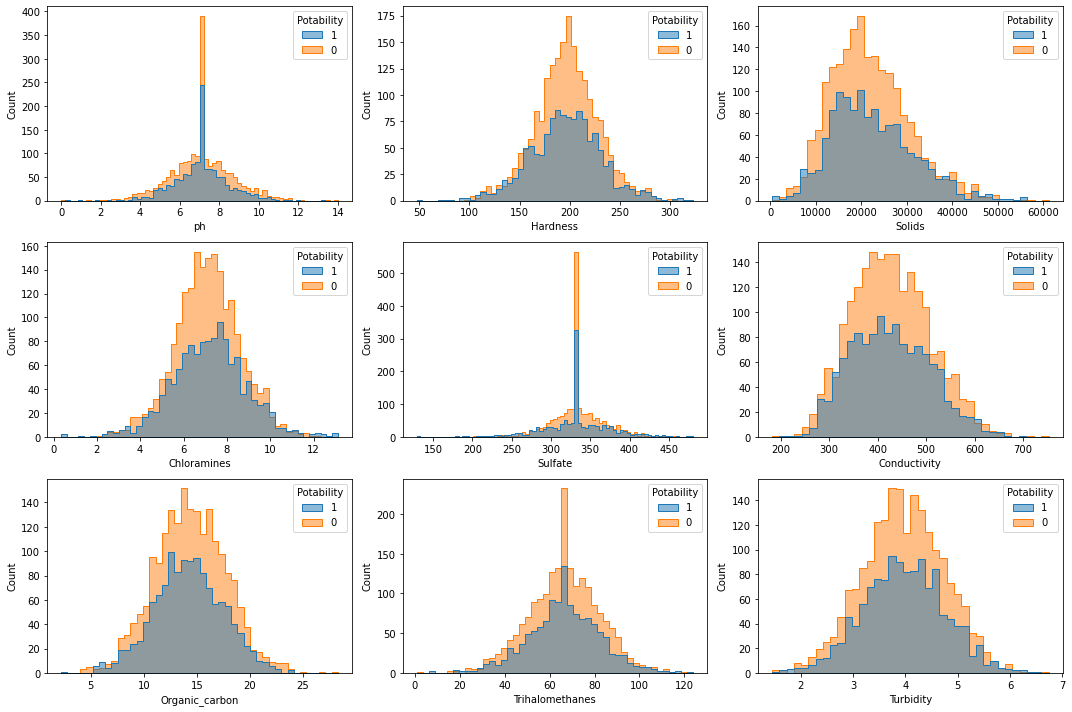

In [49]:
plt.figure(figsize = (15,10), tight_layout = True)

for i, feature in enumerate(dataset.columns):
    if feature != 'Potability':

        plt.subplot(3,3,i+1)
        sns.histplot(data = dataset, 
                     x =feature, 
                     hue = 'Potability',
                     alpha = 0.5, 
                     element="step",
                     hue_order=[1,0] )

### 2. Detecting Outlier using Z-score

Selain dengan menggunakan grafik histogram, deteksi nilai outliers juga bisa dilakukan dengan menghitung nilai Z-Score untuk setiap data. Dataset yang memiliki distribusi normal nilai Z-Score untuk setiap datanya adalah |3|.

In [50]:
dataset_z_score = dataset[dataset.columns].copy().add_prefix("z_score_")
dataset_z_score = dataset_z_score.apply(lambda x: (x - x.mean()) / x.std())
dataset_z_score.head()

,z_score_ph,z_score_Hardness,z_score_Solids,z_score_Chloramines,z_score_Sulfate,z_score_Conductivity,z_score_Organic_carbon,z_score_Trihalomethanes,z_score_Turbidity,z_score_Potability
0,-0.025470,0.259155,-0.139450,0.112398,0.965810,1.708693,-1.180470,1.305234,-1.286101,-0.799653
1,-2.284369,-2.036103,-0.385928,-0.307647,-0.014797,2.062260,0.270556,-0.639089,0.684113,-0.799653
2,0.697213,0.847535,-0.240011,1.360386,-0.014797,-0.094018,0.780998,0.000800,-1.167187,-0.799653
3,0.845264,0.547568,0.000493,0.591917,0.644031,-0.778711,1.254943,2.151825,0.848282,-0.799653
4,1.372772,-0.464358,-0.460178,-0.363642,-0.649422,-0.343886,-0.824231,-2.181964,0.138764,-0.799653


In [51]:
outliers_index = []

for col in dataset.columns:
    outliers_index.extend(dataset_z_score[np.abs(dataset_z_score["z_score_" + col]) > 3].index.to_list())

    outliers_index = list(set(outliers_index))
    print(outliers_index)

[2945, 263, 2189, 783, 3088, 3094, 1303, 2075, 2343, 810, 2096, 692, 2868, 1343, 3269, 3014, 1353, 3017, 3020, 2895, 80, 2899, 726, 2646, 104, 2925, 2928, 2681]
[2945, 1542, 263, 2189, 783, 3088, 3221, 3094, 1303, 278, 2075, 37, 2343, 810, 2861, 2096, 692, 2868, 317, 1343, 321, 3269, 3014, 1353, 3017, 3020, 2895, 80, 335, 1490, 2899, 726, 2646, 88, 347, 354, 104, 3179, 2925, 2928, 2681, 379, 383]
[2945, 1542, 263, 1031, 2189, 783, 3088, 1554, 3221, 3094, 1303, 278, 666, 2075, 283, 3226, 546, 1186, 1955, 37, 2343, 810, 2602, 1068, 2861, 2096, 692, 2868, 1077, 3130, 317, 1343, 321, 2497, 3269, 3014, 1353, 3017, 3020, 3150, 2895, 80, 335, 1490, 2899, 1746, 726, 2646, 88, 3162, 347, 354, 104, 3179, 2925, 366, 2928, 3190, 1784, 2681, 379, 383]
[1542, 1031, 3088, 1554, 3094, 2075, 546, 37, 2602, 1068, 2096, 1077, 3130, 3150, 80, 2646, 88, 3162, 104, 3179, 3190, 2681, 2694, 2699, 2189, 3221, 3226, 666, 1186, 692, 3269, 1746, 726, 757, 1784, 2302, 263, 783, 272, 275, 278, 1303, 283, 285, 287, 

### 3. Drop Outliers

Setelah diketahui indeks data mana saja yang termasuk *outlier*. Maka nilai tersebut dihilangkan agar nantinya model *Machine learning* yang kita buat akan optimal.

In [52]:
dataset.drop(index=outliers_index, inplace=True)

In [53]:
dataset.shape

(3129, 10)

### 4. Checking the correlation between these features and potability

Setelah selesai menghilangkan nilai *outliers*. Kemudian, dilanjutkan dengan mengetahui nilai korelasi antar *feature*.

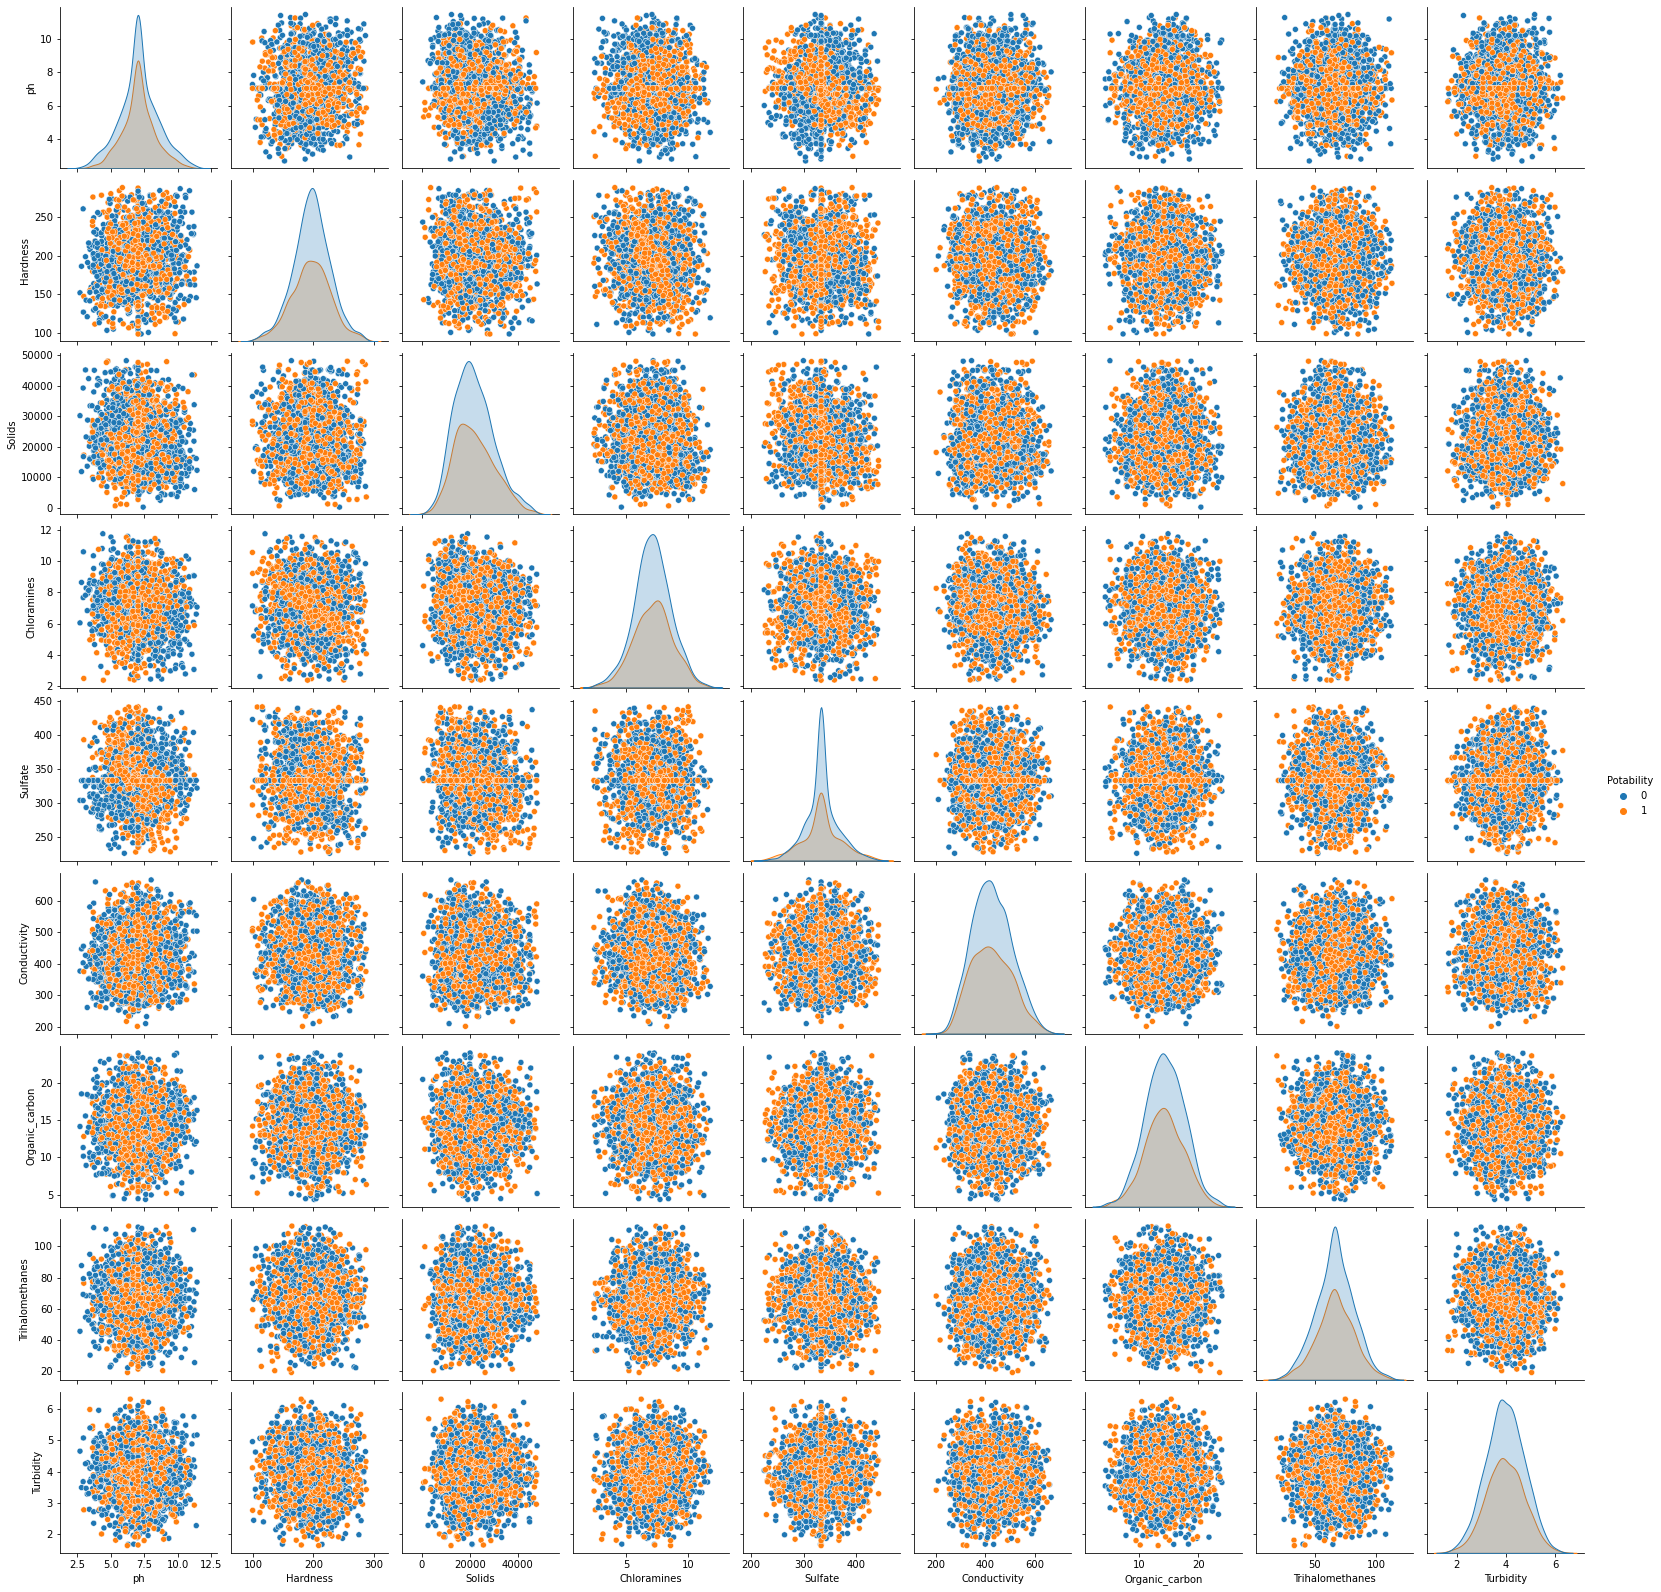

In [54]:
sns.pairplot(data = dataset, hue= "Potability")

plt.show()

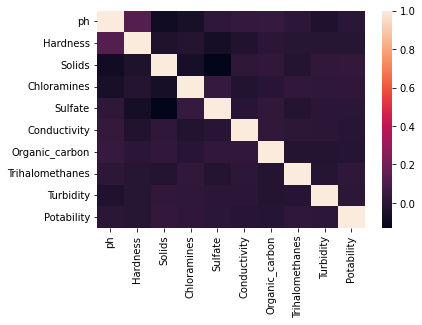

In [55]:
sns.heatmap(dataset.corr())
plt.show()

Jika, dilihat dari grafik *heatmap* di atas, masing-masing *feature* tidak memiliki korelasi yang sigifikan.

## Modeling and Prediction

### 1. Preparing Data for Training

In [56]:
X = dataset.drop(columns='Potability',axis=1)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658


In [57]:
y = np.array(dataset.Potability)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### 2. Normalizing Data

In [58]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

X

array([[-2.70149224e-02,  2.72296968e-01, -1.18739526e-01, ...,
        -1.19390452e+00,  1.33365207e+00, -1.30259536e+00],
       [-2.45153401e+00, -2.12074758e+00, -3.77247987e-01, ...,
         2.67834373e-01, -6.56257204e-01,  6.95993229e-01],
       [ 7.48653789e-01,  8.85744466e-01, -2.24208910e-01, ...,
         7.82044541e-01, -1.36593383e-03, -1.18196886e+00],
       ...,
       [ 1.71270605e+00, -6.51333900e-01,  1.36014963e+00, ...,
        -9.93142288e-01,  2.20931218e-01, -8.66174382e-01],
       [-1.42155349e+00,  1.08765522e+00, -1.17219865e+00, ...,
        -9.53593021e-01,  7.16937891e-01,  9.66370568e-01],
       [ 5.84774259e-01, -3.80814677e-02, -5.23875600e-01, ...,
         5.60276094e-01,  7.95480146e-01, -2.15269737e+00]])

### 3. Split Data to Train and Test

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print ('x test shape :', X_test.shape)
print ('x train shape :', X_train.shape)
print ('y test shape :', y_test.shape)
print ('y train shape :', y_train.shape)

x test shape : (626, 9)
x train shape : (2503, 9)
y test shape : (626,)
y train shape : (2503,)


### 4. Model Training and Testing

#### Support Vector Classifier (SVC) Model

In [60]:
svm = SVC()

In [61]:
svm_parameters = {'kernel':['rbf'],'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

svm_cv = GridSearchCV(svm,
                      svm_parameters,
                      scoring='accuracy')

In [62]:
svm_cv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [63]:
print("best parameters :",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

best parameters : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.658410379241517


In [64]:
score = svm_cv.score(X_test, y_test)
score

0.6884984025559105

In [65]:
y_pred = svm_cv.predict(X_test)



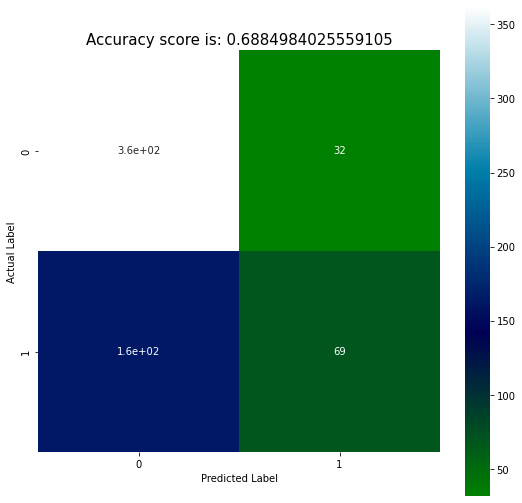

In [66]:
confusion_matrix_svm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))

sns.heatmap(confusion_matrix_svm, 
            annot=True, 
            square=True, 
            cmap='ocean')

plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

title = 'Accuracy score is: {0}'.format(score)
plt.title(title, size = 15);

#### K-Nearest Neighbors (KNN)

In [67]:
KNN = KNeighborsClassifier()

kparameter = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
'p': [1,2]}

In [68]:
knn_cv = GridSearchCV(KNN, param_grid= kparameter, cv= 10, n_jobs= -1, scoring= 'accuracy')

In [69]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [70]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.6356398406374503


In [71]:
kscore = knn_cv.score(X_test, y_test)
kscore

0.6597444089456869

In [72]:
ky_pred = knn_cv.predict(X_test)

cmknn = confusion_matrix(y_test, ky_pred)

cmknn

array([[352,  42],
       [171,  61]], dtype=int64)

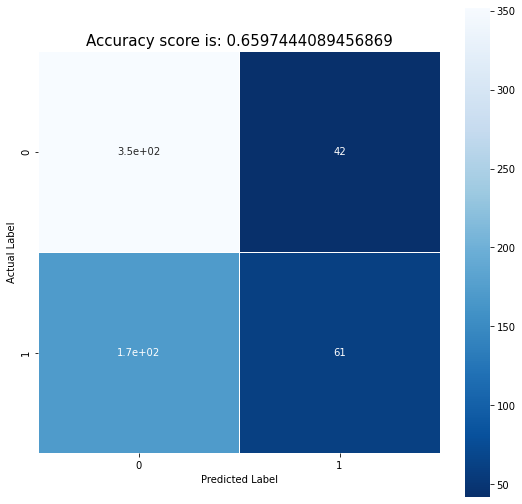

In [73]:
plt.figure(figsize=(9,9))

sns.heatmap(cmknn, annot=True, linewidths= 0.5, square= True, cmap= 'Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

allsampletitle = 'Accuracy score is: {0}'.format(kscore)
plt.title(allsampletitle, size = 15);

#### Logistic Regression

In [74]:
Lr = LogisticRegression()

lrparam = {'C':[0.01,0.1,1],
'penalty':['l2'],
'solver':['lbfgs', 'liblinear', 'sag', 'saga']}

In [75]:
lr_cv = GridSearchCV(Lr, param_grid= lrparam, cv= 10, n_jobs= -1, scoring= 'accuracy')

lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [76]:
print("tuned hpyerparameters :(best parameters) ", lr_cv.best_params_)
print("accuracy :", lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6136637450199203


In [78]:
lrscore = lr_cv.score(X_test, y_test)

lrscore

0.6293929712460063

In [81]:
ly_pred = lr_cv.predict(X_test)

cmlr = confusion_matrix(y_test, ly_pred)

cmlr

array([[394,   0],
       [232,   0]], dtype=int64)

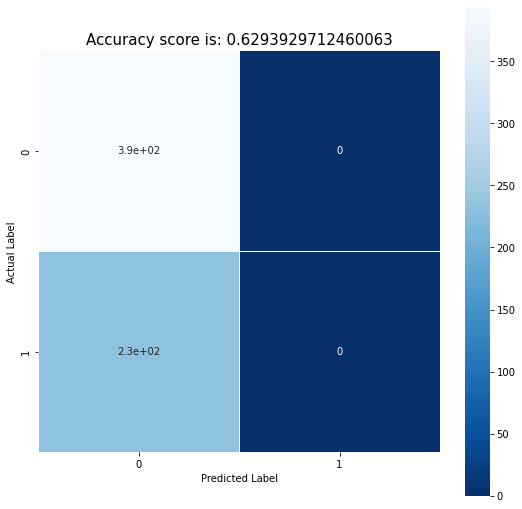

In [82]:
plt.figure(figsize=(9,9))

sns.heatmap(cmlr, annot=True, linewidths= 0.5, square= True, cmap= 'Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

allsampletitle = 'Accuracy score is: {0}'.format(lrscore)
plt.title(allsampletitle, size = 15);

#### Decision Tree

In [83]:
dt = DecisionTreeClassifier()

dtparam = {'criterion': ['gini', 'entropy'],
'splitter': ['best', 'random'],
'max_depth': [2*n for n in range(1,10)],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10]}

In [84]:
dt_cv = GridSearchCV(dt, param_grid= dtparam, cv= 10, n_jobs= -1, scoring= 'accuracy')

dt_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [85]:
print("tuned hpyerparameters :(best parameters) ",dt_cv.best_params_)
print("accuracy :",dt_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.6316462151394423


In [86]:
dtscore = dt_cv.score(X_test, y_test)

dtscore

0.6309904153354633

In [87]:
dty_pred = dt_cv.predict(X_test)

cmdt = confusion_matrix(y_test, dty_pred)

cmdt

array([[330,  64],
       [167,  65]], dtype=int64)

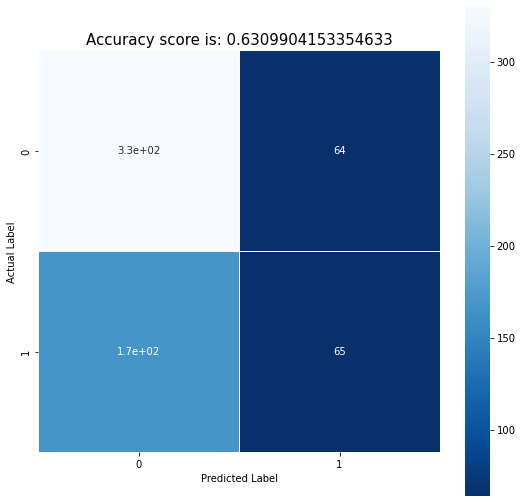

In [88]:
plt.figure(figsize=(9,9))

sns.heatmap(cmdt, annot=True, linewidths= 0.5, square= True, cmap= 'Blues_r');
plt.xlabel("Predicted Label");
plt.ylabel('Actual Label');

allsampletitle = 'Accuracy score is: {0}'.format(dtscore)
plt.title(allsampletitle, size = 15);